# Importing the Libraries and Dataset

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/home/dell/Téléchargements/Data/jnotebook/heart.csv')

# Data Analysis

## General info

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.shape

(1025, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data cleaning

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
dp_val = df.duplicated().any()
print(dp_val)

True


In [15]:
df = df.drop_duplicates()

In [17]:
df.shape

(302, 14)

## Overall Statistics and Correlation

In [79]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

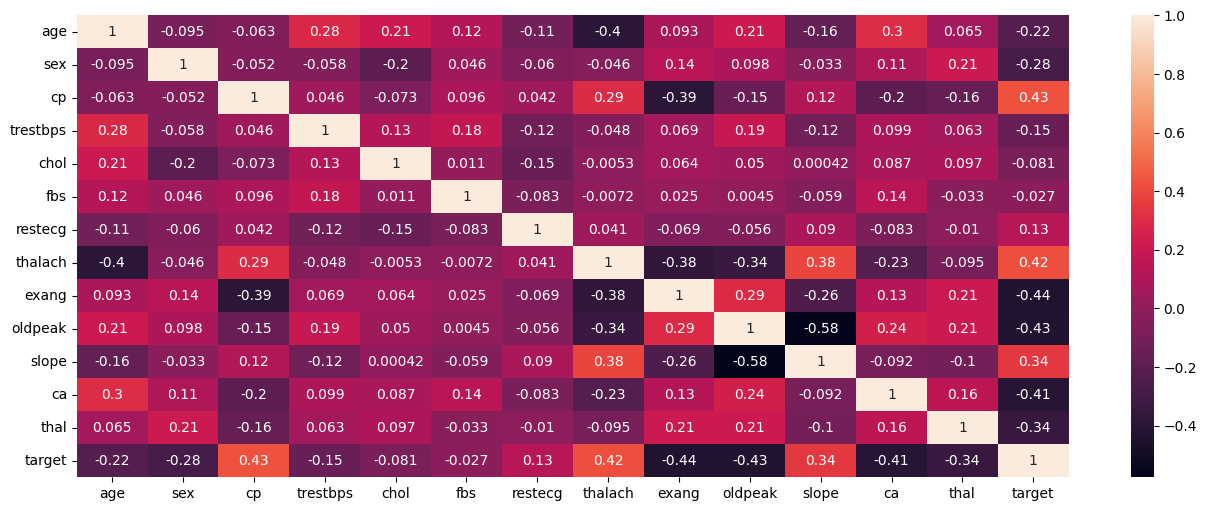

In [19]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

## How many people have heart disease and how many don't

In [82]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

## Which sex has the most heart disease

In [21]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

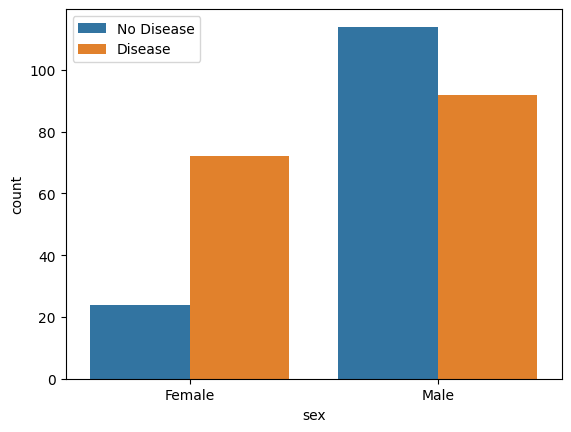

In [23]:
 sns.countplot(data=df, x=df['sex'], hue=df['target'])
plt.xticks([0,1],['Female' , 'Male'])
plt.legend(labels = ['No Disease' , 'Disease'])
plt.show()

## Age distribution 

/tmp/ipykernel_5566/1372489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20)


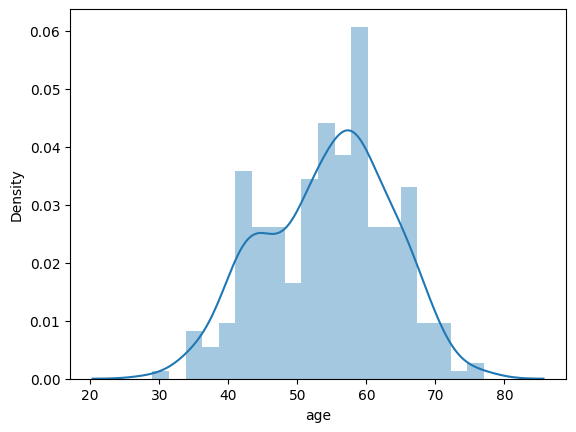

In [25]:
sns.distplot(df['age'], bins=20)
plt.show()

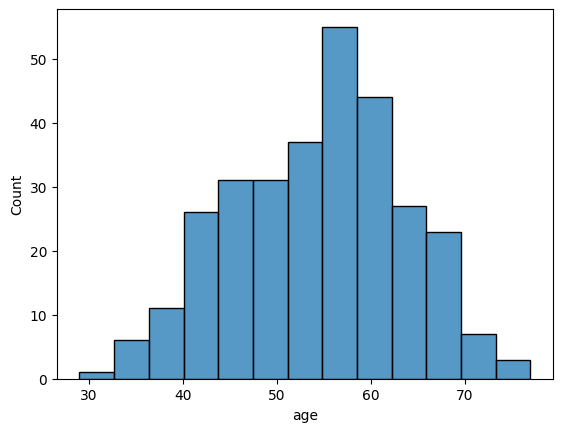

In [33]:
sns.histplot(df['age']) 
plt.show()

## Chest pain distribution as per target variable

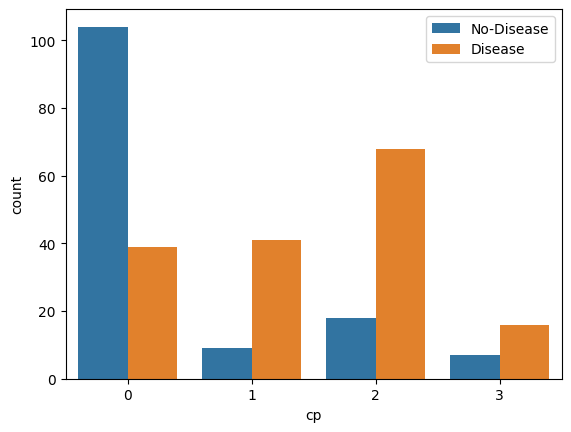

In [45]:
sns.countplot(x="cp",hue="target",data=df)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## Fasting blood sugar distribution according to target variable

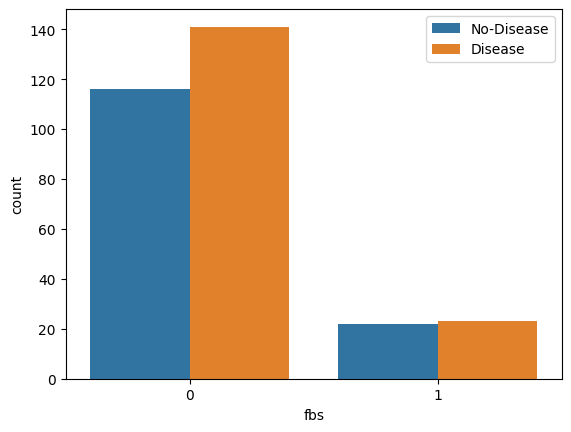

In [47]:
sns.countplot(x="fbs",hue="target",data=df)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## Resting blood pressure distribution and compare it as per sex

<Axes: >

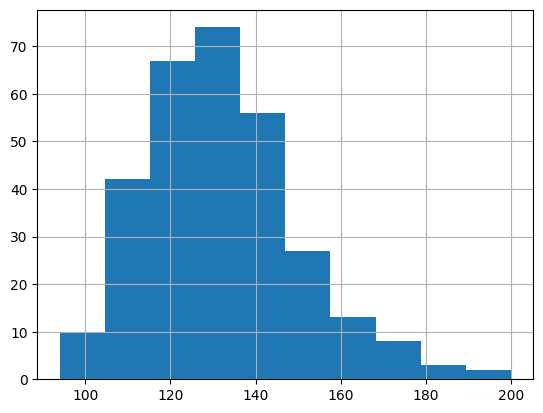

In [49]:
df['trestbps'].hist()

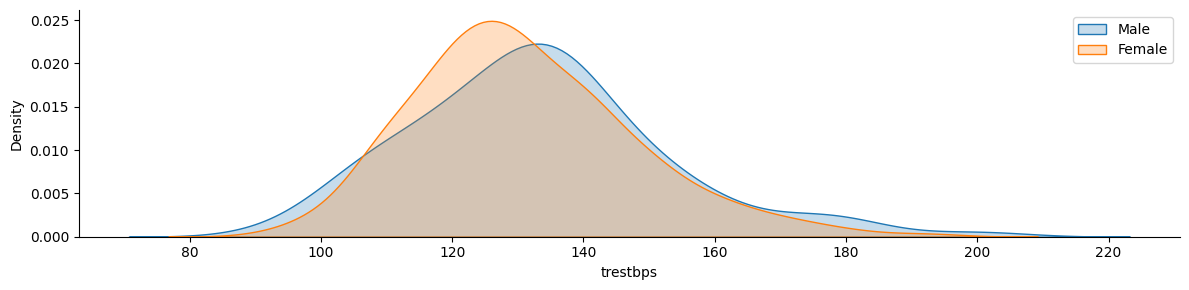

In [73]:
g = sns.FacetGrid(df,hue="sex",aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.show()

## Distribution of serum cholesterol

<Axes: >

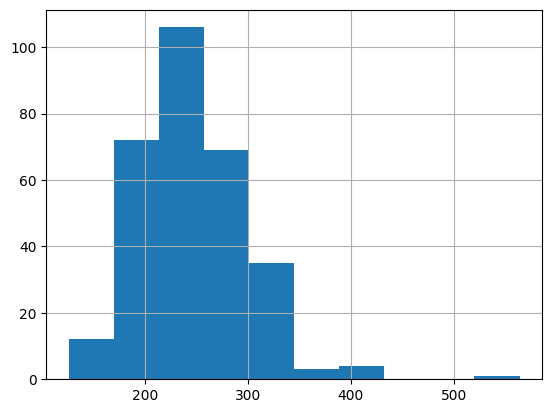

In [63]:
df['chol'].hist()

## Data processing

### Separating columns based on categorical values and continuous values

In [127]:
cate_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [131]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

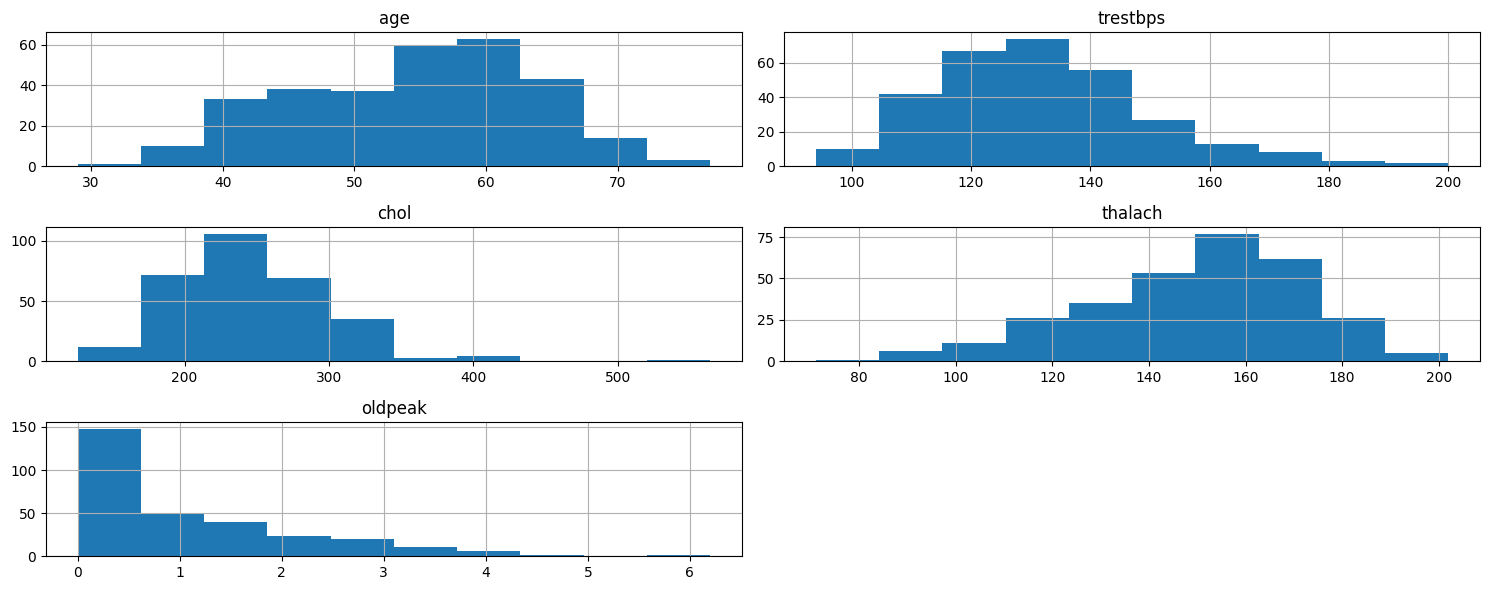

In [105]:
df.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()